# Week 9 & 10 Exercises  

***Karlie Schwartzwald  
DSC 540 Fall 2022  
Bellevue University***

Change#: 1  
Change(s) Made:  Copied over prompts.  
Date of Change:  11/6/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 11/7/2022  

Change#: 2  
Change(s) Made:  Completed.  
Date of Change:  11/7/2022  
Author: Karlie Schwartzwald  
Change Approved by: Karlie Schwartzwald  
Date Moved to Production: 11/7/2022  

## 1. Data Wrangling with Python: Activity 9 Extracting the Top 100 eBooks from Gutenberg

1. Import libraries including regex and beautifulsoup.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, urllib.parse, urllib.error
import requests
import ssl
import re
import regex
from bs4 import BeautifulSoup

2. Check the SSL certificate.

In [2]:
# Ignore SSL Certificate Errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

3. Read the HTML from the URL.

In [3]:
# Read the HTML from the URL and pass on to BeautifulSoup
url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)

4. Write a small function to check the status of the web request.

In [4]:
def check_status(response):
    if response.status_code==200:
        print("Success")
        return 1
    else:
        print("Failure")
        return -1

In [5]:
check_status(response)

Success


1

5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [6]:
contents = response.content.decode(response.encoding)

In [7]:
soup = BeautifulSoup(contents, 'html.parser')

6. Find all the **href** tags and store them in the list of links. Check what the list looks like - print the first 30 elements.

In [8]:
# Empty list to hold all the http links in the HTML page
http_links=[]

In [9]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    http_links.append(link.get('href'))

In [10]:
http_links[46:145]

['/ebooks/145',
 '/ebooks/37106',
 '/ebooks/16389',
 '/ebooks/67979',
 '/ebooks/100',
 '/ebooks/2701',
 '/ebooks/6761',
 '/ebooks/394',
 '/ebooks/2160',
 '/ebooks/4085',
 '/ebooks/6593',
 '/ebooks/5197',
 '/ebooks/1259',
 '/ebooks/84',
 '/ebooks/1342',
 '/ebooks/41',
 '/ebooks/25344',
 '/ebooks/345',
 '/ebooks/1661',
 '/ebooks/11',
 '/ebooks/1952',
 '/ebooks/46',
 '/ebooks/174',
 '/ebooks/43',
 '/ebooks/2542',
 '/ebooks/98',
 '/ebooks/64317',
 '/ebooks/20228',
 '/ebooks/4734',
 '/ebooks/1400',
 '/ebooks/2591',
 '/ebooks/1080',
 '/ebooks/844',
 '/ebooks/1260',
 '/ebooks/4300',
 '/ebooks/5200',
 '/ebooks/1184',
 '/ebooks/76',
 '/ebooks/69264',
 '/ebooks/23',
 '/ebooks/408',
 '/ebooks/2600',
 '/ebooks/69273',
 '/ebooks/1232',
 '/ebooks/2554',
 '/ebooks/6130',
 '/ebooks/205',
 '/ebooks/69260',
 '/ebooks/158',
 '/ebooks/69271',
 '/ebooks/2148',
 '/ebooks/219',
 '/ebooks/69272',
 '/ebooks/69261',
 '/ebooks/74',
 '/ebooks/30254',
 '/ebooks/120',
 '/ebooks/3207',
 '/ebooks/2814',
 '/ebooks/692

7. Use a regular expression to find the nueric digits in these links. These are the file numbers for the top 100 eBooks.

In [11]:
book_number=[]

In [12]:
# Number 46 to 154 in the original list of links have the Top 100 ebooks' number.
for i in range(46,154):
    link=http_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        book_number.append(int(n[0]))

In [13]:
print ("\nThe file numbers for the top 100 ebooks in the last 7 days on Gutenberg are shown below\n"+"-"*70)
print(book_number)


The file numbers for the top 100 ebooks in the last 7 days on Gutenberg are shown below
----------------------------------------------------------------------
[145, 37106, 16389, 67979, 100, 2701, 6761, 394, 2160, 4085, 6593, 5197, 1259, 84, 1342, 41, 25344, 345, 1661, 11, 1952, 46, 174, 43, 2542, 98, 64317, 20228, 4734, 1400, 2591, 1080, 844, 1260, 4300, 5200, 1184, 76, 69264, 23, 408, 2600, 69273, 1232, 2554, 6130, 205, 69260, 158, 69271, 2148, 219, 69272, 69261, 74, 30254, 120, 3207, 2814, 69274, 1727, 45, 768, 42108, 28054, 42324, 7370, 2852, 58585, 996, 135, 33283, 43453, 36, 779, 27827, 69270, 69268, 1399, 1497, 16328, 5740, 16, 20203, 69265, 55, 15399, 236, 514, 48320, 244, 4363, 10007, 69087, 203, 829, 160, 766, 8492, 1, 1, 7, 7, 30, 30, 838, 975, 65]


9. What does the **soup** object's text look like? Use the **.text** method and print only the first 2,000 characters (not the whole thing.)

In [14]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-10-31
last 7 days511052
last 30 days6183249



Top 100 EBooks yesterday
Top 

10. Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking). ***Note: I used Last 7 days ranking since Yesterday was unavaialable***. 

In [15]:
# Temp empty list of Ebook names
lst_titles_temp=[]

11. Create a starting index. It should point at the text *Top 100 EBooks yesterday*. Use the **splitlines** method of soup.text. It splits the lines of text of the soup object.

In [16]:
# Create a starting index
start_idx=soup.text.splitlines().index('Top 100 EBooks last 7 days')

12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: Use the **splitlines** method.

In [17]:
# Gather next 100 titles
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

13. Use a regular expression to extract only text from the name strings and append it to an empty list. Use **match** and **span** to find the indices and use them. 

In [18]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [19]:
# Print List
for l in lst_titles:
    print(l)
# Since I didn't have a chance to use "Yesterday"s top 100
# I think thats why I am getting so many rows just saying "Top"

Top 
Top 


Top 




Top 
Top 
Top 
Top 
Top 
Top 


Top 




Top 
Top 
Top 
Top 
Top 
Top 


Top 

A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Complete Works of William Shakespeare by William Shakespeare 
Moby Dick
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
The Adventures of Roderick Random by T
History of Tom Jones
My Life 
Twenty Years After by Alexandre Dumas 
Frankenstein
Pride and Prejudice by Jane Austen 
The Legend of Sleepy Hollow by Washington Irving 
The Scarlet Letter by Nathaniel Hawthorne 
Dracula by Bram Stoker 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Alice
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Christmas Carol in Prose
The Picture of Dorian Gray by Oscar Wilde 
The Strange Case of Dr
A Doll
A Tale of Two Cities by Charles Dickens 
The Great Gatsby by F
Noli Me Tangere by Jos
The 

## 2. Data Wrangling with Python: Activity 10, page 295

#### Activity: Build your own movie database by reading from an API  
##### This notebook does the following:  
* Retrieves and prints basic data about a movie (title entered by user) from the web (OMDB database)
* If a poster of the movie could be found, it downloads the file and saves at a user-specified location

1. Import **urllib.request, urllib.parse, urllib.error,** and **json**.

In [20]:
import urllib.request, urllib.parse, urllib.error
import json

2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in teh same folder in a variable by using **json.loads**. 

In [21]:
with open('APIkey.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

In [22]:
serviceurl = 'http://www.omdbapi.com/?'


6. Create a variable called **apikey** with the last portion of the URL (**&apikey=secretapikey**), where **secretapikey** is your own API key.

In [23]:
apikey = '&apikey='+omdbapi

7. Write a utility function called **print_json** to pring the movie data from a JSON file (which we will get from the portal). 

In [24]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the **os** module. The poster data is stored in teh JSON key **Poster**. Use hte python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [25]:
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

9. Write a utility function called **search_movie** to search for a movie by its name, print the downloaded **JSON** data, and save the movie poster in the local folder. Use a **try-except** loop for this. Use hte previously created **serviceurl** and **apikey** variables. You have to pass on a dictionary with a key, **t**, and the movie name as the corresponding value to the **urllib.parse.urlencode()** funciton and then add the **serviceurl** and **apikey** to the ouput of the function to construct the full URL. This URL will be used to access the data. The **JSON** data has a key called **Response**. If it is **True**, that means the read was successful. Check this before processing the data. If it's not successful, the pring the **JSON** key **Error**, which will contain the appropriate error message returned by the movie database.

In [26]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

10. Test the **search_movie** function by entering **Titanic**. 

In [27]:
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=cb6f08f2
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,164,233
imdbID: tt0120338
--------------------------------------------------


11. Test the **search_movie** function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly). 

In [28]:
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=cb6f08f2
Error encountered:  Movie not found!


## 3. Connect to the Twitter API and do a simple data pull

a. If you don’t have a twitter account – create one at twitter.com/signup (you can delete the account after this assignment)

b. Sign in to apps.twitter.com

c. Click “Create New App”

d. Give your app a name and description

e. Agree to the developer agreement – you will want to make sure to indicate this is for a class project, and this step can take several days to get through, so don’t wait until last minute to complete this portion of the assignment

f. Create an access token

g. You should receive a consumer key and a token

h. Using either the instructions from the book on connecting to an API or for help look here – pull back data searching for “Bellevue University” and “Data Science” (or something else you are interested in)

In [29]:
import tweepy

In [30]:
client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAC8UjAEAAAAA1s%2Bbss0pE3QfNL7PpzTsiYzS0Kw%3Dkk0UMaW0HaKzTi2ZJIN6XJ4VXi0melcUs8J7JE69xGfwge3Nol")
# define my question as query
query = "Bellevue University OR #BellvueUniversity"
# search recent tweets for my query
results1 = client.search_recent_tweets(query = query)
print(results1)

Response(data=[<Tweet id=1589410698484146176 text='RT @bremcmurtry08: Beyond blessed and excited to announce my commitment to Bellevue University!! So grateful for my family, coaches, and te…'>, <Tweet id=1589408298784235526 text='The all-around play of Bellevue University junior outside hitter Allie Kerns led the 16th-ranked Bruins volleyball team to a 3-1 (25-16, 22-25, 25-17, 25-15) upset victory over seventh-ranked Viterbo University https://t.co/R3FzdGrzwV'>, <Tweet id=1589408162884747269 text='RT @bremcmurtry08: Beyond blessed and excited to announce my commitment to Bellevue University!! So grateful for my family, coaches, and te…'>, <Tweet id=1589377019736776706 text='RT @NEBHSFB: Congratulations to Bellevue West 2023 TE Cayden Echternach, who has committed to attend the University of Nebraska. #NebPreps'>, <Tweet id=1589314691590803457 text="RT @OMAStormChasers: We recently dropped off donation items, that we collected from around the ballpark, to Bellevue University's Militar

## 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

In [31]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('sales_record.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


b. Scatter

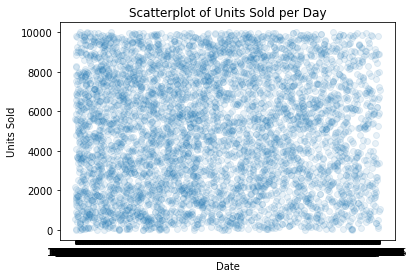

In [33]:
plt.scatter(df['Order Date'], df['Units Sold'], alpha=0.1)
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.title("Scatterplot of Units Sold per Day")
plt.show()

c. Bar

In [34]:
types = list(df['Item Type'].unique())
types.sort()
types

['Baby Food',
 'Beverages',
 'Cereal',
 'Clothes',
 'Cosmetics',
 'Fruits',
 'Household',
 'Meat',
 'Office Supplies',
 'Personal Care',
 'Snacks',
 'Vegetables']

In [35]:
profits = list(df.groupby('Item Type').sum()['Total Profit'])

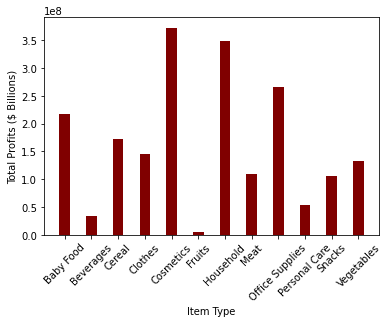

In [36]:
# creating the bar plot
plt.bar(types, profits, color ='maroon', width = 0.4)
plt.xlabel("Item Type")
plt.ylabel("Total Profits ($ Billions)")
plt.xticks(rotation = 45)
plt.show()

d. Histogram

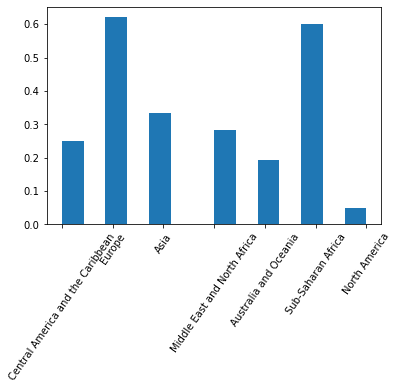

In [37]:
plt.hist(df['Region'], density=True, bins = 14, align='mid')
plt.xticks(rotation = 55)
plt.show() 